## Tutorial 1:  Introduction to Statistical Inference and Sampling

#### Lecture and Tutorial Learning Goals:
After completing this week's lecture and tutorial work, you will be able to:

1. Describe real-world examples of questions that can be answered with the statistical inference methods presented in this course (e.g., estimation, hypothesis testing).
2. Name common population parameters (mean, proportion, median, variance, standard deviation, and correlation) that are often estimated using sample data, and write computer scripts to calculate estimates of these parameters.
3. Define the following terms in relation to statistical inference: population, sample, population parameter, estimate, sampling distribution.
4. Write a computer script to draw random samples from a finite population (e.g., census data).
5. Write a computer script to reveal a sampling distribution from a finite population.

#### General instructions

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

All visible autograded questions (i.e., questions with visible tests) are worth 1 point, and all hidden autograded questions and manually graded questions are worth 3 points.

### Loading some packages

In [1]:
# Run this cell before continuing. 
library(cowplot)
library(dplyr)
library(gridExtra)
library(tidyverse)
library(repr)
library(infer)
library(repr)
source("tests_tutorial_01.R")


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.1     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2

### Vancouver Street Trees

In this tutorial, we will explore the population and sampling distributions of three different populations of trees planted in Vancouver. Specifically, we are interested in the diameters of three different sub-groups of trees planted along boulevards in the city. We will obtain these populations by filtering a single data set.

![](https://media2.giphy.com/media/kiu8isFXsj1yqVBAOv/giphy.gif?cid=ecf05e4755256f4e6c94108bd7031859932bed37b115ca3a&rid=giphy.gif)
<div style="text-align: center"><i>Image from <a href="https://media2.giphy.com/media/kiu8isFXsj1yqVBAOv/giphy.gif?cid=ecf05e4755256f4e6c94108bd7031859932bed37b115ca3a&rid=giphy.gif">giphy.com</i></a></div>


To do this, we will use the `vancouver_trees` data set, which includes information about public trees planted along boulevards in Vancouver, such as their approximate height, diameter, family and species name, and other information describing where and when the they were planted. This data is originally from the [City of Vancouver's Open Data Portal](https://opendata.vancouver.ca/explore/dataset/street-trees/information/?disjunctive.species_name&disjunctive.common_name&disjunctive.height_range_id), but we have included it in an R package called `datateachr`. The `datateachr` package contains several open source data sets that have been compiled from various sources to make them easily accessible. We will be using data from this package regularly throughout the term. Let's now load the `datateachr` package and take a look at the first few rows of the `vancouver_trees` data set.

In [2]:
library(datateachr)
head(vancouver_trees)

tree_id,civic_number,std_street,genus_name,species_name,cultivar_name,common_name,assigned,root_barrier,plant_area,on_street_block,on_street,neighbourhood_name,street_side_name,height_range_id,diameter,curb,date_planted,longitude,latitude
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<dbl>
149556,494,W 58TH AV,ULMUS,AMERICANA,BRANDON,BRANDON ELM,N,N,N,400,W 58TH AV,MARPOLE,EVEN,2,10,N,1999-01-13,-123.1161,49.21776
149563,450,W 58TH AV,ZELKOVA,SERRATA,NA,JAPANESE ZELKOVA,N,N,N,400,W 58TH AV,MARPOLE,EVEN,4,10,N,1996-05-31,-123.1147,49.21776
149579,4994,WINDSOR ST,STYRAX,JAPONICA,NA,JAPANESE SNOWBELL,N,N,4,4900,WINDSOR ST,KENSINGTON-CEDAR COTTAGE,EVEN,3,4,Y,1993-11-22,-123.0846,49.23938
149590,858,E 39TH AV,FRAXINUS,AMERICANA,AUTUMN APPLAUSE,AUTUMN APPLAUSE ASH,Y,N,4,800,E 39TH AV,KENSINGTON-CEDAR COTTAGE,EVEN,4,18,Y,1996-04-29,-123.0870,49.23469
149604,5032,WINDSOR ST,ACER,CAMPESTRE,NA,HEDGE MAPLE,N,N,4,5000,WINDSOR ST,KENSINGTON-CEDAR COTTAGE,EVEN,2,9,Y,1993-12-17,-123.0846,49.23894
149616,585,W 61ST AV,PYRUS,CALLERYANA,CHANTICLEER,CHANTICLEER PEAR,N,N,B,500,W 61ST AV,MARPOLE,ODD,2,5,Y,NA,-123.1196,49.21513


## 1. Warm Up


Before we get started, let's remind ourselves of a few important concepts and definitions.

**Question 1.0**
<br>{points: 1}

What are two parameters that are typically used to describe the centre of a distribution?

A. Standard deviation & variance

B. Standard deviation & median

C. Median & variance

D. Median & mean

_Assign your answer to an object called `answer1.0`. Your answer should be a single character surrounded by quotes._

In [3]:
answer1.0 <- "D"

# your code here


In [4]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br>{points: 3}

In one or two sentences, explain what a sampling distribution of sample means is in your own words. Do not use the word "distribution" in your explanation.

A sampling distribution of sample means is an explaination or description of how the means samples of a population are spread out.

**Question 1.2**
<br>{points: 1}

True or false?

In reality, we most often have access to data for the entire population that we are interested in studying.

_Assign your answer to an object called `answer1.2`. Your answer should be either "true" or "false", surrounded by quotes._

In [4]:
answer1.2 <- "false"

# your code here


In [5]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br>{points: 1}

Consider this unordered, numbered list of tasks related to populations, sampling, and sampling distributions: 

1. Calculate the mean of the point estimates to use as your estimate.
2. Take a random sample from the population.
3. Plot the distribution of the sample(s).
4. Calculate point estimate(s) for the sample(s).
5. Describe the uncertainty related to your estimate.
6. Plot the distribution of the point estimates.
7. Calculate the population parameter.
8. Take many random samples from the population.

Choose the order of tasks that **best** describes the process of estimating a population parameter when we do not have access to the population.

A. 8, 3, 7

B. 2, 4, 5

C. 8, 4, 1

D. 2, 7, 5

E. 8, 4, 6, 1

F. 2, 3, 7, 5

_Assign your answer to an object called `answer1.3`. Your answer should be a single character surrounded by quotes._

In [9]:
answer1.3 <- "B"

# your code here
head(vancouver_trees)

tree_id,civic_number,std_street,genus_name,species_name,cultivar_name,common_name,assigned,root_barrier,plant_area,on_street_block,on_street,neighbourhood_name,street_side_name,height_range_id,diameter,curb,date_planted,longitude,latitude
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<dbl>
149556,494,W 58TH AV,ULMUS,AMERICANA,BRANDON,BRANDON ELM,N,N,N,400,W 58TH AV,MARPOLE,EVEN,2,10,N,1999-01-13,-123.1161,49.21776
149563,450,W 58TH AV,ZELKOVA,SERRATA,NA,JAPANESE ZELKOVA,N,N,N,400,W 58TH AV,MARPOLE,EVEN,4,10,N,1996-05-31,-123.1147,49.21776
149579,4994,WINDSOR ST,STYRAX,JAPONICA,NA,JAPANESE SNOWBELL,N,N,4,4900,WINDSOR ST,KENSINGTON-CEDAR COTTAGE,EVEN,3,4,Y,1993-11-22,-123.0846,49.23938
149590,858,E 39TH AV,FRAXINUS,AMERICANA,AUTUMN APPLAUSE,AUTUMN APPLAUSE ASH,Y,N,4,800,E 39TH AV,KENSINGTON-CEDAR COTTAGE,EVEN,4,18,Y,1996-04-29,-123.0870,49.23469
149604,5032,WINDSOR ST,ACER,CAMPESTRE,NA,HEDGE MAPLE,N,N,4,5000,WINDSOR ST,KENSINGTON-CEDAR COTTAGE,EVEN,2,9,Y,1993-12-17,-123.0846,49.23894
149616,585,W 61ST AV,PYRUS,CALLERYANA,CHANTICLEER,CHANTICLEER PEAR,N,N,B,500,W 61ST AV,MARPOLE,ODD,2,5,Y,NA,-123.1196,49.21513


In [7]:
test_1.3()

[1] "Success!"


**Question 1.4**
<br>{points: 1}

We will be using the `diameter` column of the `vancouver_trees` data set throughout this tutorial. The documentation for the `vancouver_trees` data set (which can be accessed using `?vancouver_trees`) states that the diameter column is

> DBH in _**inches**_ (DBH stands for "diameter of tree at breast height").

Let's convert this to metric units (centimetres) before we get started. Use the fact that $1 \text{ in} = 2.54 \text{ cm}$
to convert the `diameter` column to centimetres by overwriting it with the `mutate` function.

_Assign your data frame to an object called `metric_trees`._

In [10]:
# metric_trees <- 
#   vancouver_trees %>% 
#   ...(...)
    
# your code here
metric_trees <- vancouver_trees %>% 
   mutate(diameter = diameter*2.54)

head(metric_trees)

tree_id,civic_number,std_street,genus_name,species_name,cultivar_name,common_name,assigned,root_barrier,plant_area,on_street_block,on_street,neighbourhood_name,street_side_name,height_range_id,diameter,curb,date_planted,longitude,latitude
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<dbl>
149556,494,W 58TH AV,ULMUS,AMERICANA,BRANDON,BRANDON ELM,N,N,N,400,W 58TH AV,MARPOLE,EVEN,2,25.40,N,1999-01-13,-123.1161,49.21776
149563,450,W 58TH AV,ZELKOVA,SERRATA,NA,JAPANESE ZELKOVA,N,N,N,400,W 58TH AV,MARPOLE,EVEN,4,25.40,N,1996-05-31,-123.1147,49.21776
149579,4994,WINDSOR ST,STYRAX,JAPONICA,NA,JAPANESE SNOWBELL,N,N,4,4900,WINDSOR ST,KENSINGTON-CEDAR COTTAGE,EVEN,3,10.16,Y,1993-11-22,-123.0846,49.23938
149590,858,E 39TH AV,FRAXINUS,AMERICANA,AUTUMN APPLAUSE,AUTUMN APPLAUSE ASH,Y,N,4,800,E 39TH AV,KENSINGTON-CEDAR COTTAGE,EVEN,4,45.72,Y,1996-04-29,-123.0870,49.23469
149604,5032,WINDSOR ST,ACER,CAMPESTRE,NA,HEDGE MAPLE,N,N,4,5000,WINDSOR ST,KENSINGTON-CEDAR COTTAGE,EVEN,2,22.86,Y,1993-12-17,-123.0846,49.23894
149616,585,W 61ST AV,PYRUS,CALLERYANA,CHANTICLEER,CHANTICLEER PEAR,N,N,B,500,W 61ST AV,MARPOLE,ODD,2,12.70,Y,NA,-123.1196,49.21513


In [11]:
test_1.4()

[1] "Success!"


## 2. Acer (Maple) Trees

First, we will take a look at the population of `ACER` trees planted along the streets in Vancouver. The `ACER` genus (or family) of trees are commonly referred to as maple trees, and there are 31 different species currently planted throughout the city. Maple trees are quite popular along streets in Vancouver, making up around 25% of the entire population. They are well known for their bright shades of red, orange, and yellow during the fall, as well as for the appearance of a maple leaf on the Canadian flag.

<img src="https://images.unsplash.com/photo-1568219273311-8616c622bc44?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80" width=500>

<div style="text-align: center"><i>Photo by <a href="https://media2.giphy.com/media/kiu8isFXsj1yqVBAOv/giphy.gif?cid=ecf05e4755256f4e6c94108bd7031859932bed37b115ca3a&rid=giphy.gif">Cindy Martin</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></i></div>

For this section, we are interested in exploring the distribution and sampling distribution of **sample means** for the `diameter` of the trees in our population of street maple trees. Recall that the **mean** is the sum of all observations of a variable divided by the total number of observations. It is used to measure the centre of a distribution and is an example of a population parameter.

**Question 2.0** 
<br> {points: 1}

Filter the `metric_trees` data set for the population of interest (`ACER` genus of street trees) and select the characteristic that we will be working with (`diameter`). Your resulting data frame should have a single column.

_Assign your data frame to an object called `acer_pop`._

In [12]:
# acer_pop <- 
#    ... %>% 
#    ...(genus_name == ...) %>% 
#    select(...)

# your code here
acer_pop <- 
    metric_trees %>% 
    filter(genus_name == "ACER") %>% 
    select(diameter)

head(acer_pop)

diameter
<dbl>
22.860
38.100
35.560
40.640
45.720
26.035


In [13]:
test_2.0()

[1] "Success!"


**Question 2.1**
<br> {points: 1}

Visualize the distribution of the population of interest (`acer_pop`) by plotting a histogram of `diameter` with bin widths of 16 using `geom_histogram`. Add a title to the plot using `ggtitle` and ensure your axis are descriptive and human-readable.

_Assign your plot to an object called `acer_pop_dist`._

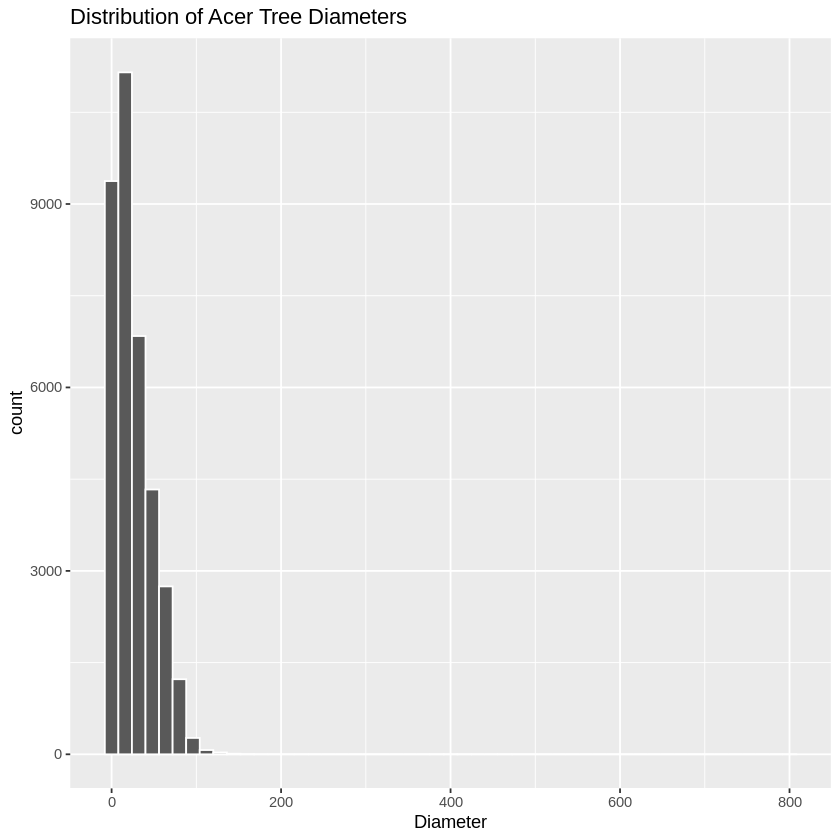

In [16]:
# acer_pop_dist <- 
#    ... %>% 
#    ggplot(aes(x = ...)) +
#    ...(... = ..., color='white') +
#    ...("Distribution of Acer Tree Diameters") +
#    xlab(...)

# your code here
acer_pop_dist <- 
    acer_pop %>% 
    ggplot(aes(x = diameter)) +
    geom_histogram(binwidth = 16, color='white') +
    ggtitle("Distribution of Acer Tree Diameters") +
    xlab("Diameter")


acer_pop_dist

In [17]:
test_2.1()

[1] "Success!"


**Question 2.2**
<br>{points: 1}

True or false?

The population distribution is approximately bell-shaped.

_Assign your answer to an object called `answer2.2`. Your answer should be either "true" or "false", surrounded by quotes._

In [20]:
# 

# your code here
answer2.2 <- 'false'

In [21]:
test_2.2()

[1] "Success!"


**Question 2.3** 
<br> {points: 1}

Take `1500` samples of size `70` from the population `acer_pop` using `rep_sample_n()` and a seed of `9558`. Then, calculate the mean diameter of each sample (which is labelled by the `replicate` column). Your final data frame should have the columns `replicate` and `sample_mean`.

_Assign your data frame to an object called `acer_estimates`._

In [24]:
set.seed(9558) # DO NOT CHANGE!

# acer_estimates <- 
#    ... %>% 
#    ...(... = 70, reps = ...) %>% 
#    ...(replicate) %>% 
#    summarize(sample_mean = ...)

# your code here
acer_estimates <- 
    acer_pop %>% 
    rep_sample_n(size = 70, reps = 1500) %>% 
    group_by(replicate) %>% 
    summarize(sample_mean = mean(diameter))

head(acer_estimates)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_mean
<int>,<dbl>
1,28.65664
2,27.42293
3,24.83939
4,29.50936
5,22.86000
6,29.69986


In [25]:
test_2.3()

[1] "Success!"


**Question 2.4**
<br> {points: 1}

Visualize the distribution of the sample means (`acer_estimates`) by plotting a histogram with bin widths of 1 using `geom_histogram`. Add a title to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `acer_sampling_dist`._

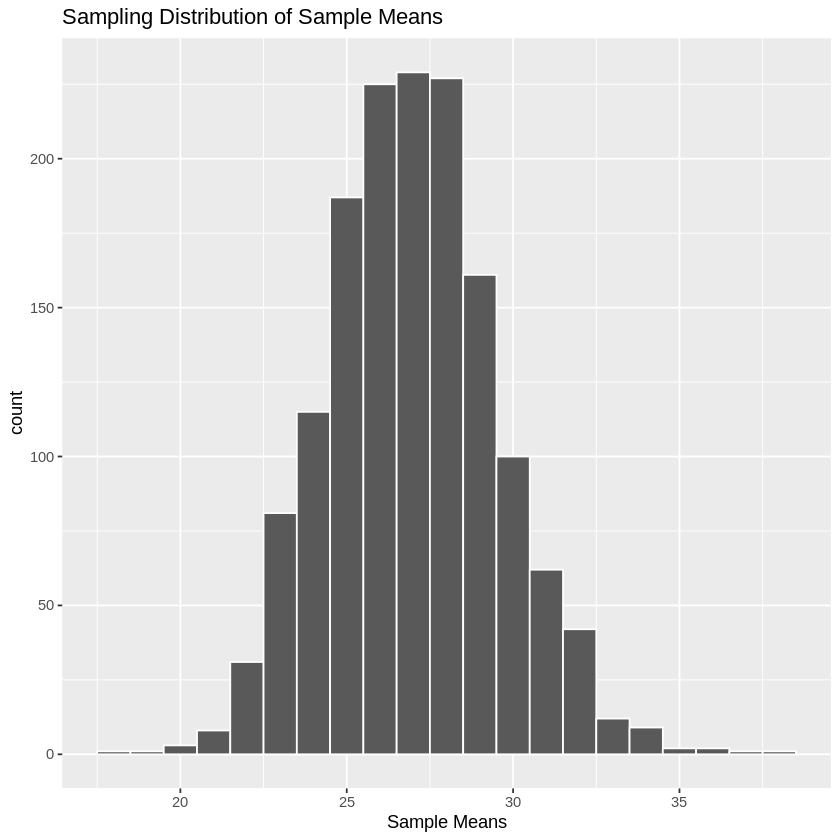

In [26]:
# acer_sampling_dist <- 
#    ... %>% 
#    ggplot(aes(x = ...)) + 
#    ...(... = ..., color='white') +
#    ...("Sampling Distribution of Sample Means") +
#    xlab("...")

# your code here
acer_sampling_dist <- 
    acer_estimates %>% 
    ggplot(aes(x = sample_mean)) + 
    geom_histogram(binwidth = 1, color='white') +
    ggtitle("Sampling Distribution of Sample Means") +
    xlab("Sample Means")


acer_sampling_dist

In [27]:
test_2.4()

[1] "Success!"


**Question 2.5**
<br>{points: 1}

Which of the following statements is true about the sampling distribution above?

A. We would normally estimate the mean of a population by using the mean of the sampling distribution.

B. The median of the population is very close to the median of the sampling distribution.

C. The mean of the population is very close to the mean of the sampling distribution.

D. The sampling distribution is of a similar shape to the population distribution.

_Assign your answer to an object called `answer2.5`. Your answer should be a single character surrounded by quotes._

In [32]:
# answer2.5 <- ...

# your code here
answer2.5 <- "C"

In [33]:
test_2.5()

[1] "Success!"


## 3. Pissard Plum Trees

Next, we are going to explore the population of Vancouver street trees with the common name `PISSARD PLUM`. These trees are a member of the plum tree family, which are often confused with cherry trees while flowering. Unlike the last part, here we are looking at a particular cultivar (cultivated variety) of trees rather than an entire family. The `PISSARD PLUM` cultivar is the second most popular cultivar along boulevards in Vancouver, making up around 6% of the total population.

<img src="https://landscapeplants.oregonstate.edu/sites/plantid7/files/plantimage/prcea2847.jpg" width=500>

<div style="text-align: center"><i>Image courtesy of <a href="https://landscapeplants.oregonstate.edu/plants/prunus-cerasifera-atropurpurea">OSU, College of Agricultural Sciences - Department of Horticulture</i></a></div>

For this section, we are interested in the sampling distribution of the **sample medians** for the `diameter` of these trees. Recall that the **median** is the middle observation of a sorted variable's data. Like the mean, it is used to measure the centre of a distribution and is another example of a population parameter.

**Question 3.0** 
<br> {points: 1}

Filter the `metric_trees` data set for the population of interest (trees with a common name of `PISSARD PLUM`) and select the characteristic that we will be working with (`diameter`). Your resulting data frame should have a single column.

_Assign your data frame to an object called `plum_pop`._

In [39]:
# your code here
plum_pop <- metric_trees %>%
            filter(common_name =="PISSARD PLUM")%>% 
            select(diameter)
head(plum_pop)

diameter
<dbl>
18.415
27.940
25.400
20.955
20.320
38.735


In [40]:
test_3.0()

[1] "Success!"


**Question 3.1**
<br> {points: 1}

Visualize the distribution of `diameter` of the population `plum_pop` by plotting a histogram with bin widths of 8 using `geom_histogram`. Add a title to the plot using `ggtitle` and ensure your axis are descriptive and human-readable.

_Assign your plot to an object called `plum_pop_dist`._

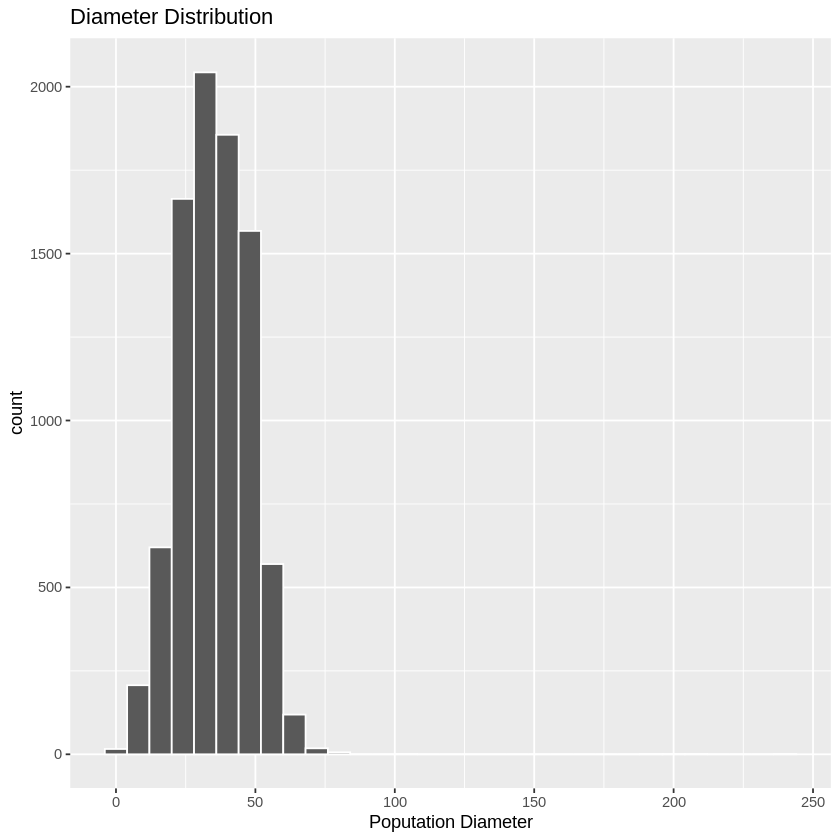

In [43]:
# your code here

plum_pop_dist <- plum_pop %>%
                ggplot(aes(x= diameter))+
                geom_histogram(binwidth=8, color="white")+
                ggtitle("Diameter Distribution")+
                xlab("Poputation Diameter")

plum_pop_dist

In [44]:
test_3.1()

[1] "Success!"


**Question 3.2**
<br> {points: 3}

Given the population distribution you visualized in the previous question, what can we say about the shape of the distribution and the median of the population?

The shape of the distribution is bell shaped and the median is roughly the peak of the histogram. Such a distributio is called a normal distribution.  

**Question 3.3**
<br> {points: 1}

Take `1500` samples of size `50` from the population `plum_pop` using `rep_sample_n()` and a seed of `8905`. Then, calculate the median of each sample (which is labelled by the `replicate` column). Your final data frame should have the columns `replicate` and `sample_median`.

_Assign your data frame to an object called `plum_estimates`._

In [48]:
set.seed(8905) # DO NOT CHANGE!
# your code here
plum_estimates <- plum_pop %>%
                  rep_sample_n(size=50, reps=1500) %>%
                  group_by(replicate) %>%
                  summarize(sample_median= median(diameter))
                  
head(plum_estimates)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_median
<int>,<dbl>
1,36.1950
2,33.0200
3,33.0200
4,35.8775
5,38.1000
6,34.9250


In [49]:
test_3.3()

[1] "Success!"


**Question 3.4** 
<br> {points: 1}

Visualize the distribution of the sample medians (`plum_estimates`) by plotting a histogram with bin widths of 1 using `geom_histogram`  Add a title to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `plum_sampling_dist`._

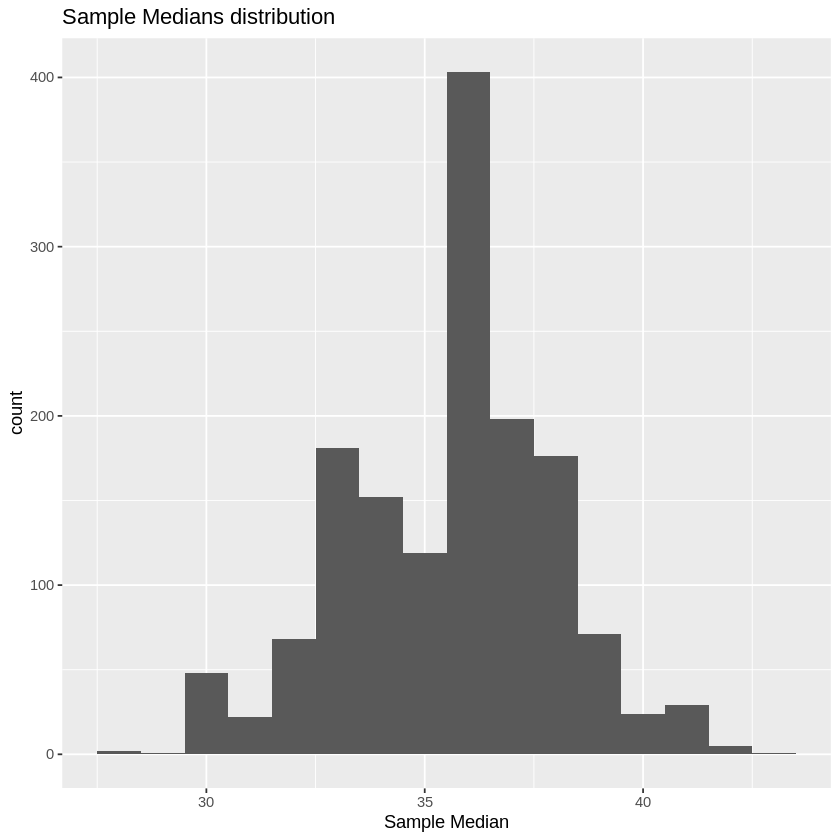

In [54]:
# your code here
plum_sampling_dist <- plum_estimates %>% 
                    ggplot(aes(x=sample_median))+
                    geom_histogram(binwidth=1)+
                    xlab("Sample Median")+
                    ggtitle("Sample Medians distribution")
plum_sampling_dist

In [55]:
test_3.4()

[1] "Success!"


**Question 3.5**
<br> {points: 3}

Suppose you took a single random sample of the diameter of 50 Pissard Plum trees from public streets in Vancouver and calculated the median of the sample as a point estimate. What are some values that you would realistically obtain: any value between 10 and 60 cm, or any value between 30 and 40 cm? Justify your response in 1-2 brief sentences.

I would most likely get a value between 30 and 40. This is because, lookin=g at the graph, there are a lot of distributions that lie in the range 30 and 40, hence most likely for a random sample to fall in the same range.

## 4. Kwanzan Flowering Cherry Trees

Finally, we are going to explore the population of `KWANZAN FLOWERING CHERRY` (common name) trees planted along streets in Vancouver. Also referred to as "Japanese Cherry trees", this cultivar is the most popular type in Vancouver, making up 7% of the population. These trees have the infamous pink blossoms that you can see all across Vancouver and on campus in early spring.

<img src="https://www.gardenia.net/storage/app/public/uploads/images/detail/Prunus%20Kanzan%20055089C104.jpg" width=500>

<div style="text-align: center"><i>Image from <a href="https://www.gardenia.net/plant/prunus-kanzan-japanese-flowering-cherry">gardenia.net</i></a></div>

Here, we are interested in looking at the sampling distribution of **sample variances**, again for the `diameter` of the trees in our population. Recall that the **variance** is the mean of the sum of the squared distances of each observation of a variable from the mean. It is typically used to measure how "wide" a distribution is and is another example of a population parameter.

**Question 4.0** 
<br> {points: 3}

Filter the `metric_trees` data set for the population of interest (trees with a common name of `KWANZAN FLOWERING CHERRY`) and select the characteristic that we will be working with (`diameter`). Your resulting data frame should have a single column.

_Assign your data frame to an object called `cherry_pop`._

In [56]:
# your code here
cherry_pop <- metric_trees %>%
            filter(common_name == "KWANZAN FLOWERING CHERRY") %>%
            select(diameter)
head(cherry_pop)

diameter
<dbl>
43.18
22.86
40.64
22.86
16.51
93.98


In [57]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "cherry_pop"', {
    expect_true(exists("cherry_pop"))
})

**Question 4.1**
<br> {points: 3}

Visualize the distribution `diameter` of the population `cherry_pop` by plotting a histogram with bins widths of 15 using `geom_histogram`. Add a title to the plot using `ggtitle` and ensure your axis are descriptive and human-readable.

_Assign your plot to an object called `cherry_pop_dist`._

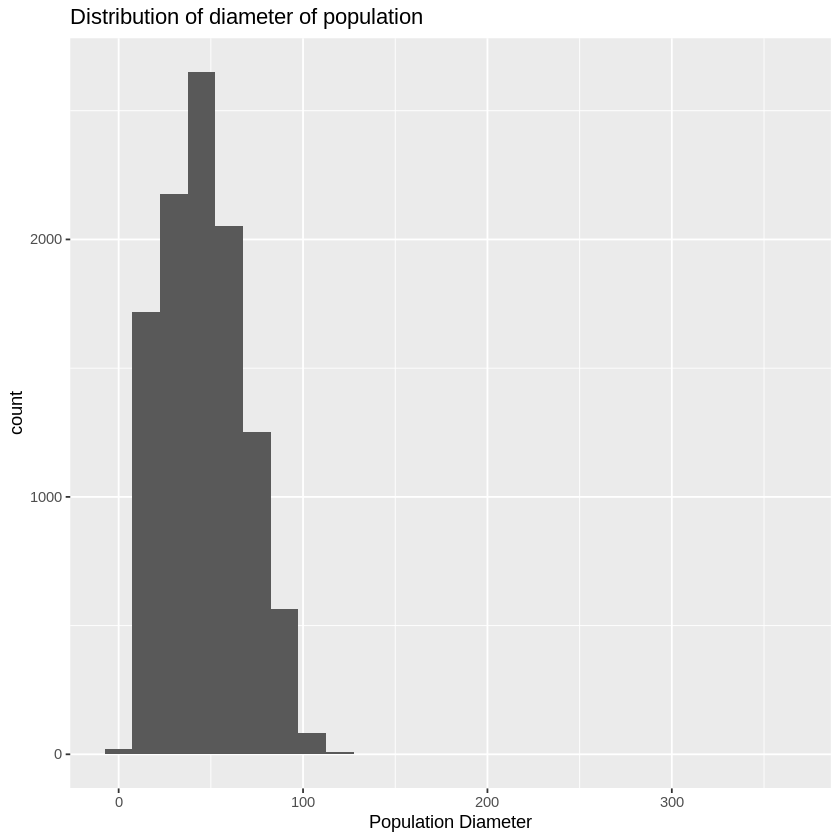

In [59]:
# your code here
cherry_pop_dist <- cherry_pop %>%
                ggplot(aes(x=diameter))+
                geom_histogram(binwidth=15)+
                xlab("Population Diameter")+
                ggtitle("Distribution of diameter of population")

cherry_pop_dist

In [ ]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "cherry_pop_dist"', {
  expect_true(exists("cherry_pop_dist"))
})

**Question 4.2**
<br> {points: 3}

Using the two population distributions below, compare the standard deviation of the two populations. Be sure to justify your answer.

**Note:** we have changed the scale and set an upper bound on where a large majority of the tree diameters fall, so you can focus on the most important parts of the distributions. This will remove a couple larger observations from our population, which results in the warnings shown below.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


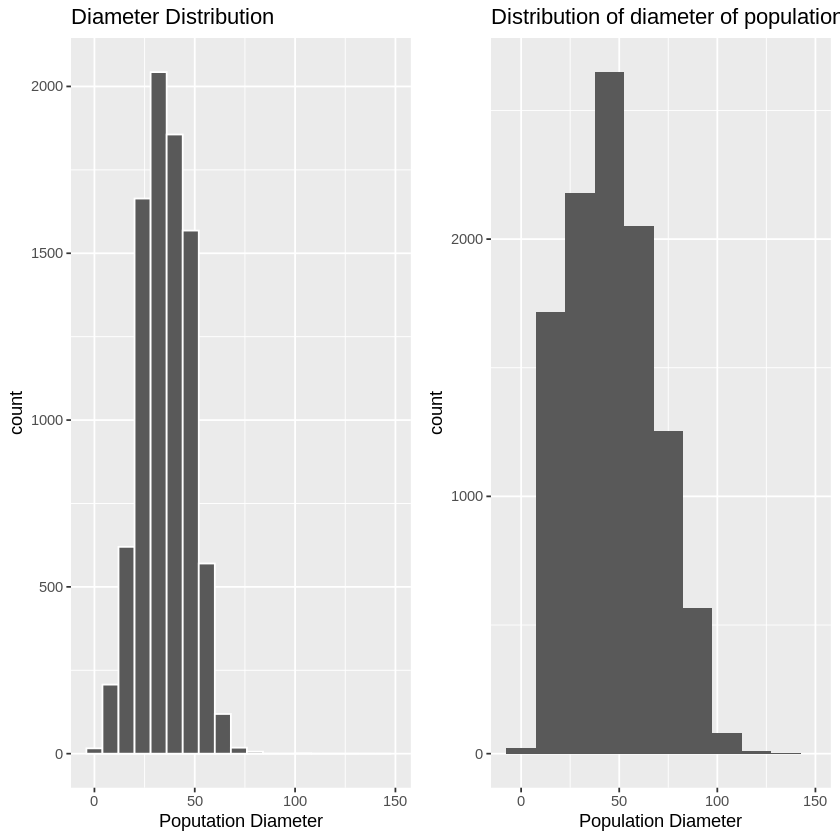

In [60]:
plot_grid(plum_pop_dist + xlim(NA, 150),
             cherry_pop_dist + xlim(NA, 150),
             ncol = 2)

The first graph looks more symetrical than the second one. The standard deviation is not significantly different.

**Question 4.3**
<br> {points: 3}

Take `1500` samples of size `90` from the population `cherry_pop` using `rep_sample_n()` and a seed of `6919`. Then, calculate the variance of each sample (which is labelled by the `replicate` column). Your final data frame should have the columns `replicate` and `sample_variance`.

**Hint:** you can use `var()` to compute variance.

_Assign your data frame to an object called `cherry_estimates`._

In [62]:
set.seed(6919) # DO NOT CHANGE THIS

# your code here
cherry_estimates <- cherry_pop %>% 
                    rep_sample_n(size= 90, reps=1500) %>%
                    group_by(replicate) %>%
                    summarize(sample_variance = var(diameter))
head(cherry_estimates)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_variance
<int>,<dbl>
1,477.4017
2,478.5221
3,462.6115
4,581.9231
5,457.1865
6,499.5910


In [63]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "cherry_estimates"', {
  expect_true(exists("cherry_estimates"))
})

**Question 4.4**
<br> {points: 3}

Visualize the distribution of the sample variances (`cherry_estimates`) by plotting a histogram with bin widths of 25 using `geom_histogram`. Add a title to the plot using `ggtitle` and ensure that the x-axis has a descriptive and human-readable label.

_Assign your plot to an object called `cherry_sampling_dist`._

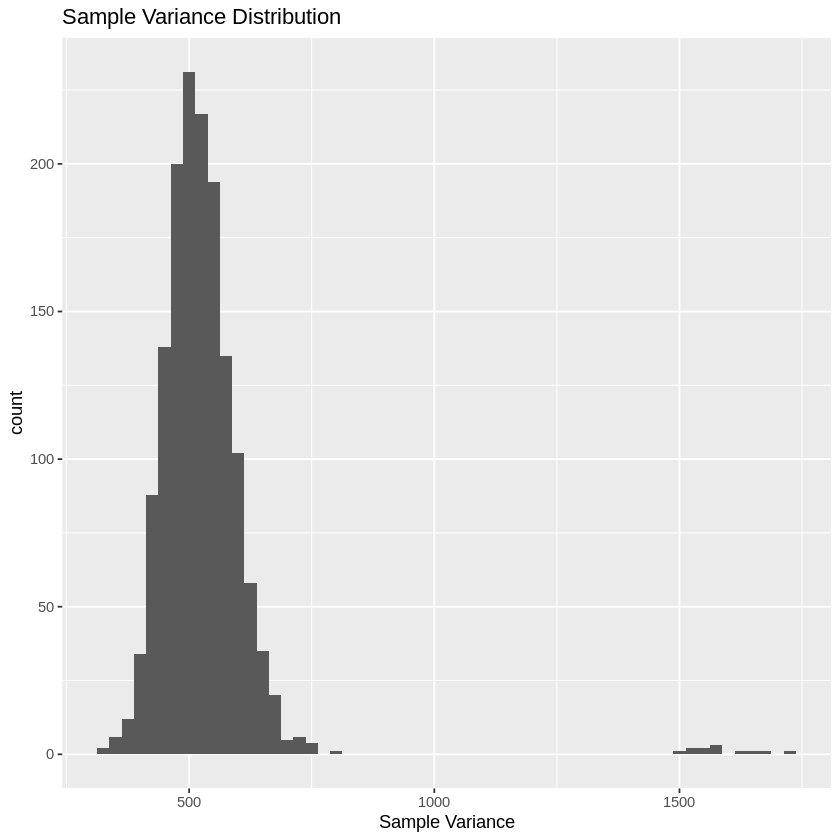

In [65]:
# your code here
cherry_sampling_dist <- cherry_estimates %>%
                        ggplot(aes(x=sample_variance))+
                        geom_histogram(binwidth=25)+
                        xlab("Sample Variance")+
                        ggtitle("Sample Variance Distribution")
cherry_sampling_dist

In [66]:
# Here we check to see whether you have given your answer the correct
# object name. However, all other tests have been hidden so you can
# practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "cherry_sampling_dist"', {
  expect_true(exists("cherry_sampling_dist"))
})